In [58]:
import pandas as pd
import numpy as np
import zipfile
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

In [59]:
data = pd.read_csv('data/sites.csv')

In [60]:
data.head()

,Site Id,Name,Principal Investigator,Data Use Policy,AmeriFlux BASE Data,AmeriFlux FLUXNET Data,Vegetation Abbreviation (IGBP),Vegetation Description (IGBP),Climate Class Abbreviation (Koeppen),Climate Class Description (Koeppen),...,Mean Average Temperature (degrees C),Country,Latitude (degrees),Longitude (degrees),Elevation (m),Years of BASE Data,Site Start,Site End,BASE Start,BASE End
0,CA-Ca1,British Columbia - 1949 Douglas-fir stand,T. Andrew Black (andrew.black@ubc.ca),CC-BY-4.0,Yes,No,ENF,Evergreen Needleleaf Forests: Lands dominated ...,Cfb,"Marine West Coast: mild with no dry season, wa...",...,9.93,Canada,49.8673,-125.3336,300.0,"1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003...",1997,NaN,1996,2010
1,CA-Ca2,British Columbia - Clearcut Douglas-fir stand ...,T. Andrew Black (andrew.black@ubc.ca),CC-BY-4.0,Yes,No,ENF,Evergreen Needleleaf Forests: Lands dominated ...,Cfb,"Marine West Coast: mild with no dry season, wa...",...,9.86,Canada,49.8705,-125.2909,300.0,"1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006...",2000,NaN,1999,2010
2,CA-Ca3,British Columbia - Pole sapling Douglas-fir stand,T. Andrew Black (andrew.black@ubc.ca),CC-BY-4.0,Yes,No,ENF,Evergreen Needleleaf Forests: Lands dominated ...,Cfb,"Marine West Coast: mild with no dry season, wa...",...,9.94,Canada,49.5346,-124.9004,NaN,"2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008...",2001,NaN,2001,2021
3,CA-HPC,Havikpak Creek,Phil Marsh (pmarsh@wlu.ca),Legacy,Yes,No,ENF,Evergreen Needleleaf Forests: Lands dominated ...,Dfc,"Subarctic: severe winter, no dry season, cool ...",...,-8.20,Canada,68.3203,-133.5188,80.0,2018,2013,2017.0,2018,2018
4,CA-LP1,British Columbia - Mountain pine beetle-attack...,Thomas Andrew Black (andrew.black@ubc.ca),CC-BY-4.0,Yes,Yes,ENF,Evergreen Needleleaf Forests: Lands dominated ...,Csa,"Mediterranean: mild with dry, hot summer",...,2.00,Canada,55.1119,-122.8414,751.0,"2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014...",2007,NaN,2007,2020


In [61]:
sites = data[(data['BASE Start'] < 2016) & (data['BASE End'] >= 2020)]
sites

,Site Id,Name,Principal Investigator,Data Use Policy,AmeriFlux BASE Data,AmeriFlux FLUXNET Data,Vegetation Abbreviation (IGBP),Vegetation Description (IGBP),Climate Class Abbreviation (Koeppen),Climate Class Description (Koeppen),...,Mean Average Temperature (degrees C),Country,Latitude (degrees),Longitude (degrees),Elevation (m),Years of BASE Data,Site Start,Site End,BASE Start,BASE End
2,CA-Ca3,British Columbia - Pole sapling Douglas-fir stand,T. Andrew Black (andrew.black@ubc.ca),CC-BY-4.0,Yes,No,ENF,Evergreen Needleleaf Forests: Lands dominated ...,Cfb,"Marine West Coast: mild with no dry season, wa...",...,9.94,Canada,49.5346,-124.9004,NaN,"2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008...",2001,NaN,2001,2021
4,CA-LP1,British Columbia - Mountain pine beetle-attack...,Thomas Andrew Black (andrew.black@ubc.ca),CC-BY-4.0,Yes,Yes,ENF,Evergreen Needleleaf Forests: Lands dominated ...,Csa,"Mediterranean: mild with dry, hot summer",...,2.00,Canada,55.1119,-122.8414,751.0,"2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014...",2007,NaN,2007,2020
18,US-ALQ,Allequash Creek Site,Ankur Desai (desai@aos.wisc.edu),CC-BY-4.0,Yes,No,WET,Permanent Wetlands: Lands with a permanent mix...,Dfb,Warm Summer Continental: significant precipita...,...,NaN,USA,46.0308,-89.6067,NaN,"2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022",2015,NaN,2015,2022
21,US-BZB,Bonanza Creek Thermokarst Bog,Eugenie Euskirchen (seeuskirchen@alaska.edu),CC-BY-4.0,Yes,Yes,WET,Permanent Wetlands: Lands with a permanent mix...,Dfd,"Subarctic: severe, very cold winter, no dry se...",...,-2.40,USA,64.6955,-148.3208,100.0,"2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018...",2011,NaN,2011,2021
22,US-BZF,Bonanza Creek Rich Fen,Eugenie Euskirchen (seeuskirchen@alaska.edu),CC-BY-4.0,Yes,Yes,WET,Permanent Wetlands: Lands with a permanent mix...,Dfd,"Subarctic: severe, very cold winter, no dry se...",...,-2.40,USA,64.7013,-148.3121,95.0,"2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018...",2011,NaN,2011,2021
24,US-BZS,Bonanza Creek Black Spruce,Eugenie Euskirchen (seeuskirchen@alaska.edu),CC-BY-4.0,Yes,Yes,ENF,Evergreen Needleleaf Forests: Lands dominated ...,Dfd,"Subarctic: severe, very cold winter, no dry se...",...,-2.40,USA,64.6963,-148.3235,100.0,"2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017...",2010,2017.0,2010,2021
26,US-CMW,Charleston Mesquite Woodland,Russell Scott (russ.scott@ars.usda.gov),CC-BY-4.0,Yes,No,DBF,Deciduous Broadleaf Forests: Lands dominated b...,Bsh,Steppe: very cold winter,...,17.00,USA,31.6637,-110.1777,1199.0,"2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007...",2001,NaN,2000,2021
33,US-EML,"Eight Mile Lake Permafrost thaw gradient, Heal...",Ted Schuur (ted.Schuur@nau.edu),CC-BY-4.0,Yes,No,OSH,Open Shrublands: Lands with woody vegetation l...,ET,Tundra,...,-1.00,USA,63.8784,-149.2536,700.0,"2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015...",2008,NaN,2008,2020
35,US-ICh,Imnavait Creek Watershed Heath Tundra,Syndonia Bret-Harte (msbretharte@alaska.edu),CC-BY-4.0,Yes,No,OSH,Open Shrublands: Lands with woody vegetation l...,ET,Tundra,...,-7.40,USA,68.6068,-149.2958,940.0,"2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014...",2007,NaN,2007,2021
36,US-ICs,Imnavait Creek Watershed Wet Sedge Tundra,Syndonia Bret-Harte (msbretharte@alaska.edu),CC-BY-4.0,Yes,Yes,WET,Permanent Wetlands: Lands with a permanent mix...,ET,Tundra,...,-7.40,USA,68.6058,-149.3110,920.0,"2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014...",2007,NaN,2007,2021


In [62]:
files = [f for f in listdir('data') if isfile(join('data', f)) and '.zip' in f]
extract_names = [f.split('_')[1] for f in files if '_' in f]
sites_in_range = []
for n in range(len(extract_names)):
    if extract_names[n] in list(sites['Site Id']):
        sites_in_range.append(files[n])
sites_in_range

['AMF_US-Ro4_FLUXNET_FULLSET_2014-2021_3-5.zip',
 'AMF_US-BZB_FLUXNET_FULLSET_2011-2021_3-5.zip',
 'AMF_US-UMd_FLUXNET_FULLSET_2007-2021_3-5.zip',
 'AMF_CA-LP1_FLUXNET_FULLSET_2007-2020_3-5.zip',
 'AMF_US-BZS_FLUXNET_FULLSET_2010-2021_3-5.zip',
 'AMF_US-ICt_FLUXNET_FULLSET_2007-2021_3-5.zip',
 'AMF_US-Ne1_FLUXNET_FULLSET_2001-2020_3-5.zip',
 'AMF_US-Myb_FLUXNET_FULLSET_2010-2021_3-5.zip',
 'AMF_US-BZF_FLUXNET_FULLSET_2011-2021_3-5.zip',
 'AMF_US-Me2_FLUXNET_FULLSET_2002-2020_3-5.zip',
 'AMF_US-ICs_FLUXNET_FULLSET_2007-2020_3-5.zip',
 'AMF_US-Tw1_FLUXNET_FULLSET_2011-2020_3-5.zip']

In [63]:
for file in sites_in_range:
    with zipfile.ZipFile('data/' + file, 'r') as zip_ref:
        zip_ref.extractall('data/extracted/' + file)

Using AMF_CA-LP1_FLUXNET_FULLSET_YY_2007-2020_3-5.csv dataset:

**GPP data available:**

--> Daytime & Nighttime partitioning available

GPP_DT_VUT_REF		Gross Primary Production, from Daytime partitioning method, reference selected from GPP versions using model efficiency (MEF). The MEF analysis is repeated for each time aggregation

GPP_DT_VUT_USTAR50		Gross Primary Production, from Daytime partitioning method, based on NEE_VUT_USTAR50

GPP_DT_VUT_MEAN		Gross Primary Production, from Daytime partitioning method, average from GPP versions, each from corresponding NEE_VUT_XX version

GPP_DT_VUT_SE		Standard Error for Gross Primary Production, calculated as (SD(GPP_DT_VUT_XX) / SQRT(40))

GPP_DT_VUT_XX		Gross Primary Production, from Daytime partitioning method (with XX = 05, 16, 25, 50, 75, 84, 95)

GPP_DT_CUT_REF		Gross Primary Production, from Daytime partitioning method, reference selected from GPP versions using model efficiency (MEF). The MEF analysis is repeated for each time aggregation

GPP_DT_CUT_USTAR50		Gross Primary Production, from Daytime partitioning method, based on NEE_CUT_USTAR50

GPP_DT_CUT_MEAN		Gross Primary Production, from Daytime partitioning method, average from GPP versions, each from corresponding NEE_CUT_XX version

GPP_DT_CUT_SE		Standard Error for Gross Primary Production, calculated as (SD(GPP_DT_CUT_XX) / SQRT(40))

GPP_DT_CUT_XX		Gross Primary Production, from Daytime partitioning method (with XX = 05, 16, 25, 50, 75, 84, 95)

In [78]:
file = 'AMF_CA-LP1_FLUXNET_FULLSET_2007-2020_3-5.zip'
data = pd.read_csv('data/extracted/' + file + '/AMF_CA-LP1_FLUXNET_FULLSET_WW_2007-2020_3-5.csv')
data.head()

,TIMESTAMP_START,TIMESTAMP_END,TA_F_MDS,TA_F_MDS_QC,TA_F_MDS_NIGHT,TA_F_MDS_NIGHT_SD,TA_F_MDS_NIGHT_QC,TA_F_MDS_DAY,TA_F_MDS_DAY_SD,TA_F_MDS_DAY_QC,...,GPP_DT_CUT_SE,GPP_DT_CUT_05,GPP_DT_CUT_16,GPP_DT_CUT_25,GPP_DT_CUT_50,GPP_DT_CUT_75,GPP_DT_CUT_84,GPP_DT_CUT_95,RECO_SR,RECO_SR_N
0,20070101,20070107,-9999.000,-9999.000000,-9999.000,-9999.000,-9999.000000,-9999.000,-9999.000,-9999.000000,...,0.034268,0.163369,0.202753,0.208136,0.550775,0.631511,0.656492,0.705797,-9999,-9999
1,20070108,20070114,-9999.000,-9999.000000,-9999.000,-9999.000,-9999.000000,-9999.000,-9999.000,-9999.000000,...,0.042548,0.194835,0.245264,0.252361,0.677128,0.777334,0.808277,0.869261,-9999,-9999
2,20070115,20070121,-9.918,0.458333,-9.867,0.625,0.491071,-10.019,0.830,0.392857,...,0.042710,0.190542,0.240977,0.248209,0.673205,0.774693,0.806073,0.867975,-9999,-9999
3,20070122,20070128,-9.899,1.000000,-10.355,1.523,1.000000,-9.069,1.891,1.000000,...,0.054318,0.306663,0.367246,0.378035,0.928833,1.050410,1.087720,1.160970,-9999,-9999
4,20070129,20070204,-7.597,1.000000,-8.222,1.961,1.000000,-6.555,2.081,1.000000,...,0.061559,0.350938,0.419135,0.431198,1.055980,1.193550,1.235780,1.318690,-9999,-9999


In [79]:
print('shape: ', data.shape)
data.columns

shape:  (728, 329)


Index(['TIMESTAMP_START', 'TIMESTAMP_END', 'TA_F_MDS', 'TA_F_MDS_QC',
       'TA_F_MDS_NIGHT', 'TA_F_MDS_NIGHT_SD', 'TA_F_MDS_NIGHT_QC',
       'TA_F_MDS_DAY', 'TA_F_MDS_DAY_SD', 'TA_F_MDS_DAY_QC',
       ...
       'GPP_DT_CUT_SE', 'GPP_DT_CUT_05', 'GPP_DT_CUT_16', 'GPP_DT_CUT_25',
       'GPP_DT_CUT_50', 'GPP_DT_CUT_75', 'GPP_DT_CUT_84', 'GPP_DT_CUT_95',
       'RECO_SR', 'RECO_SR_N'],
      dtype='object', length=329)

In [80]:
data.describe()

,TIMESTAMP_START,TIMESTAMP_END,TA_F_MDS,TA_F_MDS_QC,TA_F_MDS_NIGHT,TA_F_MDS_NIGHT_SD,TA_F_MDS_NIGHT_QC,TA_F_MDS_DAY,TA_F_MDS_DAY_SD,TA_F_MDS_DAY_QC,...,GPP_DT_CUT_SE,GPP_DT_CUT_05,GPP_DT_CUT_16,GPP_DT_CUT_25,GPP_DT_CUT_50,GPP_DT_CUT_75,GPP_DT_CUT_84,GPP_DT_CUT_95,RECO_SR,RECO_SR_N
count,7.280000e+02,7.280000e+02,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,...,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.0,728.0
mean,2.013566e+07,2.013568e+07,-23.632525,-26.485745,-25.053933,-25.379288,-26.485367,-22.670684,-24.861396,-26.486323,...,0.018562,1.049915,1.096741,1.126079,1.201008,1.270783,1.312633,1.399545,-9999.0,-9999.0
std,4.034040e+04,4.034035e+04,524.023434,523.781128,523.934543,523.839718,523.781147,524.077910,523.867930,523.781098,...,0.023127,1.253060,1.288880,1.311136,1.351989,1.408141,1.439795,1.526164,0.0,0.0
min,2.007010e+07,2.007011e+07,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.0,-9999.0
25%,2.010068e+07,2.010071e+07,-3.050750,1.000000,-3.540500,1.624500,1.000000,-2.430500,1.544500,1.000000,...,0.001980,0.039347,0.045903,0.047342,0.055117,0.098841,0.116399,0.136606,-9999.0,-9999.0
50%,2.013566e+07,2.013567e+07,3.995500,1.000000,2.888000,2.019500,1.000000,4.997000,2.636000,1.000000,...,0.011136,0.485817,0.529707,0.553054,0.626170,0.683904,0.744298,0.796638,-9999.0,-9999.0
75%,2.017064e+07,2.017070e+07,12.182750,1.000000,10.007500,2.559000,1.000000,13.394750,3.473000,1.000000,...,0.025390,1.881217,1.994575,2.031913,2.118447,2.224263,2.304568,2.474240,-9999.0,-9999.0
max,2.020122e+07,2.020123e+07,21.771000,1.000000,17.733000,4.038000,1.000000,23.740000,5.964000,1.000000,...,0.150452,6.488500,6.519430,6.604920,6.816250,7.049390,7.219100,7.460560,-9999.0,-9999.0


In [81]:
data.isnull().sum(axis=0)

TIMESTAMP_START    0
TIMESTAMP_END      0
TA_F_MDS           0
TA_F_MDS_QC        0
TA_F_MDS_NIGHT     0
                  ..
GPP_DT_CUT_75      0
GPP_DT_CUT_84      0
GPP_DT_CUT_95      0
RECO_SR            0
RECO_SR_N          0
Length: 329, dtype: int64

In [82]:
data[data == -9999.000000].count()[300:]

RECO_DT_CUT_25          0
RECO_DT_CUT_50          0
RECO_DT_CUT_75          0
RECO_DT_CUT_84          0
RECO_DT_CUT_95          0
GPP_DT_VUT_REF          0
GPP_DT_VUT_USTAR50      0
GPP_DT_VUT_MEAN         0
GPP_DT_VUT_SE           0
GPP_DT_VUT_05           0
GPP_DT_VUT_16           0
GPP_DT_VUT_25           0
GPP_DT_VUT_50           0
GPP_DT_VUT_75           0
GPP_DT_VUT_84           0
GPP_DT_VUT_95           0
GPP_DT_CUT_REF          0
GPP_DT_CUT_USTAR50      0
GPP_DT_CUT_MEAN         0
GPP_DT_CUT_SE           0
GPP_DT_CUT_05           0
GPP_DT_CUT_16           0
GPP_DT_CUT_25           0
GPP_DT_CUT_50           0
GPP_DT_CUT_75           0
GPP_DT_CUT_84           0
GPP_DT_CUT_95           0
RECO_SR               728
RECO_SR_N             728
dtype: int64

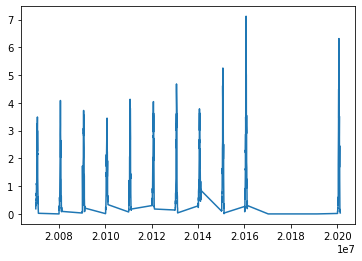

In [83]:
plt.plot(data['TIMESTAMP_END'], data['GPP_DT_VUT_REF'])

In [84]:
data['GPP_DT_VUT_REF']

0      0.185949
1      0.223827
2      0.219496
3      0.341408
4      0.390018
         ...   
723    0.101852
724    0.049583
725    0.034432
726    0.029431
727    0.030127
Name: GPP_DT_VUT_REF, Length: 728, dtype: float64

In [85]:
data = pd.read_csv('data/extracted/' + file + '/AMF_CA-LP1_FLUXNET_FULLSET_DD_2007-2020_3-5.csv')
data.columns

Index(['TIMESTAMP', 'TA_F_MDS', 'TA_F_MDS_QC', 'TA_F_MDS_NIGHT',
       'TA_F_MDS_NIGHT_SD', 'TA_F_MDS_NIGHT_QC', 'TA_F_MDS_DAY',
       'TA_F_MDS_DAY_SD', 'TA_F_MDS_DAY_QC', 'TA_ERA',
       ...
       'GPP_DT_CUT_SE', 'GPP_DT_CUT_05', 'GPP_DT_CUT_16', 'GPP_DT_CUT_25',
       'GPP_DT_CUT_50', 'GPP_DT_CUT_75', 'GPP_DT_CUT_84', 'GPP_DT_CUT_95',
       'RECO_SR', 'RECO_SR_N'],
      dtype='object', length=334)

In [87]:
data.describe()

,TIMESTAMP,TA_F_MDS,TA_F_MDS_QC,TA_F_MDS_NIGHT,TA_F_MDS_NIGHT_SD,TA_F_MDS_NIGHT_QC,TA_F_MDS_DAY,TA_F_MDS_DAY_SD,TA_F_MDS_DAY_QC,TA_ERA,...,GPP_DT_CUT_SE,GPP_DT_CUT_05,GPP_DT_CUT_16,GPP_DT_CUT_25,GPP_DT_CUT_50,GPP_DT_CUT_75,GPP_DT_CUT_84,GPP_DT_CUT_95,RECO_SR,RECO_SR_N
count,5.114000e+03,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,...,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5114.0,5114.0
mean,2.013567e+07,-15.772062,-18.568118,-15.235544,-15.506679,-16.612520,-14.812497,-16.948564,-18.568694,3.792274,...,0.021466,1.021313,1.077439,1.111203,1.194932,1.274137,1.323637,1.421380,-9999.0,-9999.0
std,4.032055e+04,442.055524,441.810957,419.346482,419.228328,419.179743,442.103834,441.886070,441.810932,10.041605,...,0.027655,1.265487,1.312507,1.339403,1.393381,1.462274,1.505603,1.606784,0.0,0.0
min,2.007010e+07,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-32.059000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.0,-9999.0
25%,2.010070e+07,-2.465000,1.000000,-3.073500,1.067000,1.000000,-1.843500,1.129250,1.000000,-2.404750,...,0.001709,0.021514,0.026758,0.028449,0.037407,0.059538,0.087029,0.109283,-9999.0,-9999.0
50%,2.013567e+07,4.106500,1.000000,2.947000,1.806000,1.000000,5.144500,2.263500,1.000000,4.177500,...,0.012373,0.416575,0.469039,0.497639,0.588650,0.670053,0.699910,0.752247,-9999.0,-9999.0
75%,2.017070e+07,12.232000,1.000000,10.157750,2.851500,1.000000,13.213750,3.842250,1.000000,12.101000,...,0.030319,1.760890,1.854450,1.910743,2.038063,2.201897,2.280630,2.442045,-9999.0,-9999.0
max,2.020123e+07,24.909000,1.000000,20.424000,11.166000,1.000000,26.947000,9.055000,1.000000,23.677000,...,0.215019,7.327310,7.342860,7.541550,7.923050,8.220420,8.536100,8.708730,-9999.0,-9999.0


In [88]:
data['TIMESTAMP']

0       20070101
1       20070102
2       20070103
3       20070104
4       20070105
          ...   
5109    20201227
5110    20201228
5111    20201229
5112    20201230
5113    20201231
Name: TIMESTAMP, Length: 5114, dtype: int64

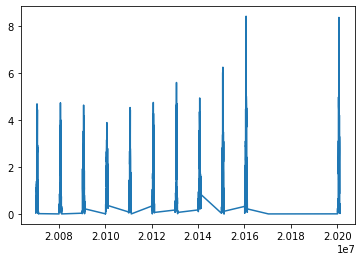

In [86]:
plt.plot(data['TIMESTAMP'], data['GPP_DT_VUT_REF'])